# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

## 1-Is the distribution of body temperatures normal?

Graphical Methods:

We begin by plotting a normed histogram along with a line plot of the pdf of a normal distribution with mean and variance deduced from the data.

To avoid binning bias, ECDFs are also plotted of both the theoretical normal distribution (with mean and variance deduced from the sample), and from the obtained observations.

We then also plot a Normal Probability plot, which is basically a plot of the quantiles for the sample vs the quantiles from a normal distribution.


In [63]:
#this function is from Datacamp

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


Comparing Histogram To Theoretical PDF

Text(0,0.5,'Probability Density')

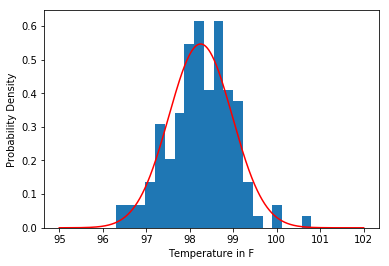

In [64]:
#Compare Histogram to PDF

# Get The temperatures as a numpy array: The sample
Temps=df.temperature.values

#sample mean:
mean=np.mean(Temps)

#sample standard deviation
std=np.std(Temps)

plt.hist(Temps,bins=20,density=True)

x=np.linspace(95,102,1000)
y=norm.pdf(x,loc=mean,scale=std)
plt.plot(x,y,color='red')

plt.xlabel('Temperature in F')
plt.ylabel('Probability Density')

Comparing ECDF to theoretical CDF

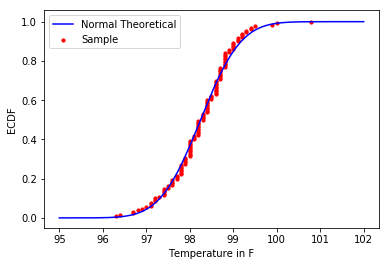

In [65]:
#Compare CDF of normal distribution to ECDF of sample:
x,y=ecdf(Temps)
plt.scatter(x,y,color='red',s=10,label='Sample')

x=np.linspace(95,102,1000)
y=norm.cdf(x,loc=mean,scale=std)
plt.plot(x,y,color='blue',label='Normal Theoretical')
plt.legend()
plt.xlabel('Temperature in F')
plt.ylabel('ECDF')


plt.show()

Plotting Q-Q Plot

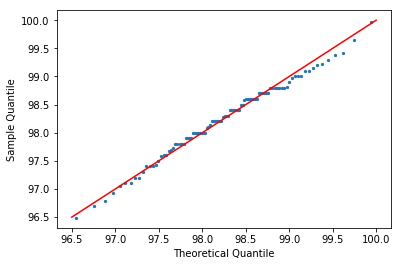

In [66]:
#A Q-Q Plot is drawn:
x=np.linspace(0,1,100)
y1=norm.ppf(x,loc=mean,scale=std)

y2=np.percentile(Temps,x*100)
plt.scatter(y1,y2,s=5)

x=[96.5,100]
y=x[:]

plt.plot(x,y,color='red')


plt.xlabel('Theoretical Quantile')
plt.ylabel('Sample Quantile')


plt.show()

The D'Agostino and Pearson Test is used, since it is readily available through the scipy library

In [67]:
from scipy import stats
k2,p=stats.normaltest(Temps)
print('k2 is '+str(k2)+' and p is: '+str(p))

k2 is 2.703801433319203 and p is: 0.2587479863488254


With a typical significance level of 10% and a p_value of 0.26 the null hypothesis that the underlying distibution is normal cannot be rejected.

## 2-Is the sample size large? Are the observations independent?

In [68]:
print('The sample has size: '+str(len(Temps)))

The sample has size: 130


Which is greater than 30, so the sample size is considered large.
Since the human population is well greater than 130/0.1 = 1300, we can assume that
the sample meets the 10% rule, and that the observations are independent.

## 3-Is the true population mean really 98.6 degrees F? 

# Bootstrap Method:

In [69]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [70]:
#function that draws Bootstrapped replicates.
#obtained from DataCamp

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

Let H0 be the null hypothesis that the population mean is 98.6.
Ha: The alternate hypothesis that the population mean is less than 98.6.

We set a significance level of 5%.


In [71]:
#Shift Temps to have a mean=98.6.

Temps_shifted=Temps-mean+98.6

#obtain 10,000 bootstrap replicates
BS_Replicates=draw_bs_reps(Temps_shifted,np.mean,10000)

#calculate the probability that we see a mean as extreme as 
#the one observed
p_value=np.sum(BS_Replicates<=mean)/len(BS_Replicates)
print(p_value)


0.0


With a p_value as low as shown above, the hypothesis is rejected. Thus it is not likely that the mean of the population is 98.6.

# Frequentist Method:
-We are to use a one sample test. We are not comparing to see if two populations have the same mean (that would be a two-sample test).

The Null and alternate hypothesis are as stated above and the significance level is set at 0.05.



-t vs z statistic: Since the population variance is not known, we need to do a t-test. However, we can do a z-test and use the sample variance as a guess. Since the sample size is large, we expect both methods to yield similar results. 

In [72]:
#calculate the z-statistic:


z=(mean-98.6)/(std/np.sqrt(len(Temps)))
print('z statistic: '+str(z))
#Caculate the P-Value: the probability the observed mean or more extreme occurs:
p_value=stats.norm.cdf(z)

print('the p value of: '+
      str(p_value)+
      ' is less than the significance level of 0.05. The Null Hypothesis is thus rejected')

z statistic: -5.4759252020785585
the p value of: 2.1761575829356528e-08 is less than the significance level of 0.05. The Null Hypothesis is thus rejected


In [73]:
#calculate the t-statistic:

t=(mean-98.6)/(std/np.sqrt(len(Temps)))
print('t statistic: '+str(t))
#calculate the p-value:
p_value=stats.t.cdf(t,len(Temps)-1)
print('the p value of: '+
      str(p_value)+
      ' is less than the significance level of 0.05. The Null Hypothesis is thus rejected')


t statistic: -5.4759252020785585
the p value of: 1.0943732312025389e-07 is less than the significance level of 0.05. The Null Hypothesis is thus rejected


Since the sample size was large (130), both the t-test and z-test gave similar results. Note since the z-statistic is using the sample variance as an estimate to the population variance, thus the z and t statistic are identical. 

## 4-Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [74]:
#randomly draw a subset of the Temps sample with size 10.
Temps_Subset=np.random.choice(Temps,size=10)
mean_s=np.mean(Temps_Subset)
std_s=np.std(Temps_Subset)

z=(mean_s-98.6)/(std_s/np.sqrt(len(Temps_Subset)))

t=(mean_s-98.6)/(std_s/np.sqrt(len(Temps_Subset)))



In [75]:
p_value_z=stats.norm.cdf(z)
if p_value_z<0.05:
    print('for the z- test the p value of: '+
      str(p_value_z)+
      ' is less than the significance level of 0.05. The Null Hypothesis is thus rejected')
else:
    print('for the z- test the p value of: '+
      str(p_value_z)+
      ' is greater than the significance level of 0.05. The Null Hypothesis is not rejected')

for the z- test the p value of: 0.0005155010211962383 is less than the significance level of 0.05. The Null Hypothesis is thus rejected


In [76]:
p_value_t=stats.t.cdf(t,len(Temps_Subset)-1)
if p_value_t<0.05:
    print('for the t- test the p value of: '+
      str(p_value_t)+
      ' is less than the significance level of 0.05. The Null Hypothesis is thus rejected')
else:
    print('for the t- test the p value of: '+
      str(p_value_t)+
      ' is greater than the significance level of 0.05. The Null Hypothesis is not rejected')


for the t- test the p value of: 0.004749994154785451 is less than the significance level of 0.05. The Null Hypothesis is thus rejected


In general, the p_value associated with the t-test is higher than that for the z-test here. 

Since the sample size is small (10), it is better to trust the results from the t-test. (since we are estimating the population variance, it is wiser to use t-test regardless).

## 5-At what temperature should we consider someone's temperature to be "abnormal"? 

We begin using a bootstrap approach. 

We want to get an idea about what a normal temperature is. To do so, we build a confidence interval. We start by obtaining 10,000 bootstrap samples for observations of size 1. Since it is not favorable to state that a body temperature is normal when it is infact abnormal (Type II error), it is potentially better to use a significnance level of 0.1. 

In [77]:
#bootstrap method:

Observations=np.random.choice(Temps,size=10000)

CI=np.percentile(Observations,[5,95])
print('With a signifcance level of 0.1 '+
     'a temperature is condidered normal if '+
      'it is within the interval '+str(CI))


With a signifcance level of 0.1 a temperature is condidered normal if it is within the interval [96.9 99.3]


Since we have assumed that population temperature is normal, we use the sample variance as an approximation of the population variance and get a confidence interval assuming normality.

In [78]:
#frequentist method:

lb=stats.norm.ppf(0.05,loc=mean,scale=std)
up=stats.norm.ppf(0.95,loc=mean,scale=std)
CI=[lb,up]
print('With a signifcance level of 0.1 '+
     'a temperature is condidered normal if '+
      'it is within the interval '+str(CI))

With a signifcance level of 0.1 a temperature is condidered normal if it is within the interval [97.04789912762658, 99.45056241083492]


We note that the two methods (bootstrap and frequentist) gave similar results.

## Is there a significant difference between males and females in normal temperature? 
we use a 2 sample bootstrap to build a 95% confidence interval for the statistic:

Mean_Female-Mean_Male.




In [79]:
Temp_M=df[df['gender']=='M']['temperature'].values
Temp_F=df[df['gender']=='F']['temperature'].values


bs_Mean_M=draw_bs_reps(Temp_M,np.mean,10000)
bs_Mean_F=draw_bs_reps(Temp_F,np.mean,10000)
bs_statistic=bs_Mean_F-bs_Mean_M

CI=np.percentile(bs_statistic,[2.5,97.5])

print('The 95% confidence interval for the statistc: Mean_F-Mean_M is '+
     str(CI)+' and we can conclude with 95% confidence that women have higher temperatures '+
      'than men')

The 95% confidence interval for the statistc: Mean_F-Mean_M is [0.03846154 0.53230769] and we can conclude with 95% confidence that women have higher temperatures than men


C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


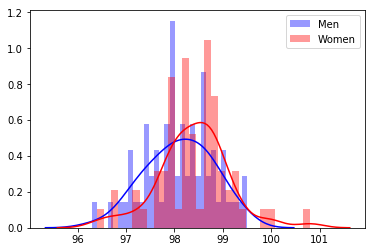

In [80]:
#for sake of visuals we also plot the normed histograms of men and women:

sns.distplot(Temp_M,color='blue',kde=True,bins=30)
sns.distplot(Temp_F,color='red',kde=True,bins=30)
plt.legend(['Men','Women'])